# Chapter 6.2 - Understanding recurrent neural networks

## Simple RNN

SimpleRNN layer takes input of shape (batch_size, timesteps, input_features)


In [2]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN

In [3]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 32)                2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


Like all recurrent layers in Keras, SimpleRNN can be run in two different modes: it can return either the full sequences of successive outputs for each timestep (a 3D tensor of shape (batch_size, timesteps, output_features)), or it can return only the last output for each input sequence (a 2D tensor of shape (batch_size, output_features))

In [5]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, None, 32)          2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


Stacking multiple recurrent layers on top of each other can have benefits, like with convolutional neural networks.

In [8]:
model = Sequential()
model.add(Embedding(input_dim = 10000, 
                    output_dim = 32))
model.add(SimpleRNN(units = 32, 
                    return_sequences = True))
model.add(SimpleRNN(units = 32, 
                    return_sequences = True))
model.add(SimpleRNN(units = 32, 
                    return_sequences = True))
# The last layer returns only the last outputs
model.add(SimpleRNN(32))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_11 (SimpleRNN)    (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_12 (SimpleRNN)    (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_13 (SimpleRNN)    (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_14 (SimpleRNN)    (None, 32)                2080      
Total params: 328,320
Trainable params: 328,320
Non-trainable params: 0
_________________________________________________________________


## IMDB example

In [9]:
from keras.datasets import imdb
from keras.preprocessing.sequence import pad_sequences

In [10]:
# Number of words to be used as features
max_features = 10000 
# Cutting the review after this number of words
maxlen = 500  
batch_size = 32

In [12]:
print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')

print('Pad sequences (samples x time)')
input_train = pad_sequences(input_train, maxlen=maxlen)
input_test = pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


In [13]:
from keras.layers import Dense

model = Sequential()
model.add(Embedding(input_dim = max_features, 
                    output_dim = 32))
model.add(SimpleRNN(units = 32))
model.add(Dense(units = 1, 
                activation='sigmoid'))

model.compile(optimizer = 'rmsprop', 
              loss = 'binary_crossentropy', 
              metrics = ['acc'])
history = model.fit(x = input_train, 
                    y = y_train,
                    epochs = 10,
                    batch_size = 128,
                    validation_split = 0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 47s 2ms/step - loss: 0.6472 - acc: 0.6102 - val_loss: 0.5290 - val_acc: 0.7522
Epoch 2/10
20000/20000 [==============================] - 41s 2ms/step - loss: 0.4153 - acc: 0.8217 - val_loss: 0.3960 - val_acc: 0.8328
Epoch 3/10
20000/20000 [==============================] - 42s 2ms/step - loss: 0.3040 - acc: 0.8766 - val_loss: 0.4501 - val_acc: 0.7864
Epoch 4/10
20000/20000 [==============================] - 43s 2ms/step - loss: 0.2303 - acc: 0.9107 - val_loss: 0.3894 - val_acc: 0.8364
Epoch 5/10
20000/20000 [==============================] - 43s 2ms/step - loss: 0.1805 - acc: 0.9346 - val_loss: 0.4967 - val_acc: 0.8336
Epoch 6/10
20000/20000 [==============================] - 45s 2ms/step - loss: 0.1221 - acc: 0.9576 - val_loss: 0.4190 - val_acc: 0.8396
Epoch 7/10
20000/20000 [==============================] - 41s 2ms/step - loss: 0.0786 - acc: 0.9742 - val_loss: 0.4795 - val_acc:

## Visualizing the results

In [14]:
import matplotlib.pyplot as plt

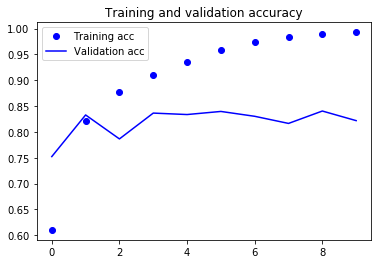

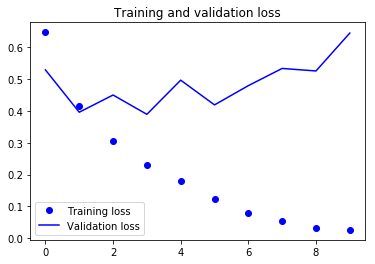

In [15]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# LSTM

In [16]:
from keras.layers import LSTM

model = Sequential()
model.add(Embedding(input_dim = max_features, 
                    output_dim = 32))
model.add(LSTM(units = 32))
model.add(Dense(units = 1, 
                activation = 'sigmoid'))

model.compile(optimizer = 'rmsprop',
              loss = 'binary_crossentropy',
              metrics = ['acc'])
history = model.fit(x = input_train, 
                    y = y_train,
                    epochs = 10,
                    batch_size = 128,
                    validation_split = 0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 195s 10ms/step - loss: 0.5080 - acc: 0.7631 - val_loss: 0.3552 - val_acc: 0.8706
Epoch 2/10
20000/20000 [==============================] - 190s 9ms/step - loss: 0.2900 - acc: 0.8862 - val_loss: 0.3028 - val_acc: 0.8766
Epoch 3/10
20000/20000 [==============================] - 183s 9ms/step - loss: 0.2338 - acc: 0.9091 - val_loss: 0.3408 - val_acc: 0.8818
Epoch 4/10
20000/20000 [==============================] - 183s 9ms/step - loss: 0.1981 - acc: 0.9250 - val_loss: 0.4363 - val_acc: 0.8672
Epoch 5/10
20000/20000 [==============================] - 198s 10ms/step - loss: 0.1745 - acc: 0.9362 - val_loss: 0.2977 - val_acc: 0.8868
Epoch 6/10
20000/20000 [==============================] - 200s 10ms/step - loss: 0.1536 - acc: 0.9438 - val_loss: 0.7284 - val_acc: 0.8106
Epoch 7/10
20000/20000 [==============================] - 211s 11ms/step - loss: 0.1431 - acc: 0.9496 - val_loss: 0.3726

## Visualizing the results

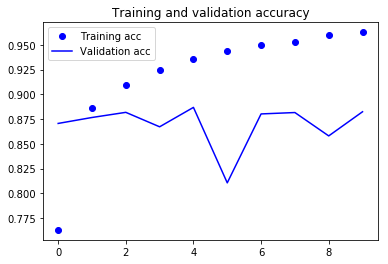

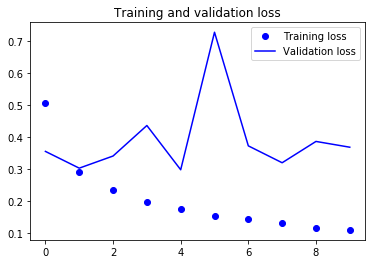

In [18]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Predictably, LSTM seems to handle longer sequence better than SimpleRNN, but it is much slower. 

No free lunch theorem in practise.